In [1]:
import numpy as np
import matplotlib.pyplot as plt

def find_equilibrium(G, q, mode='all one', tol=1e-5, max_iter=1000):
    n = len(q)  # Number of agents
    x = np.zeros(n)  # Initial actions
    
    if mode == 'all one':
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum(G[i, :] * x)
                x_new[i] = max(0, q[i] - sum_gx)
            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'all two':
        G2 = np.linalg.matrix_power(G, 2)
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum((G[i, :] + G2[i, :]) * x)
                x_new[i] = max(0, q[i] - sum_gx)

            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'one two unaware':
        G2 = np.linalg.matrix_power(G, 2)  # Compute G squared
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            x_old = np.zeros(n)
            
            # Calculate x_old of unaware agents
            sum_g1x_old = np.sum(G[0, :] * x)
            x_old[0] = max(0, q[0] - sum_g1x_old)


            # Update x1 using G + G^2
            sum_g1x = np.sum((G[0, :] + G2[0, :]) * x)
            x_new[0] = max(0, q[0] - sum_g1x)

            # Update x2 using G
            sum_g2x = G[1, 0] * x_old[0] + G[1, 2] * x[2]
            x_new[1] = max(0, q[1] - sum_g2x)
            
            # Update x3 using G
            sum_g3x = G[2, 0] * x_old[0] + G[2, 1] * x[1]
            x_new[2] = max(0, q[2] - sum_g3x)

            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'one two aware':
        G2 = np.linalg.matrix_power(G, 2)  # Compute G squared
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            
            # Update x1 using G + G^2
            sum_g1x = np.sum((G[0, :] + G2[0, :]) * x)
            x_new[0] = max(0, q[0] - sum_g1x)

            # Update x2 using G
            sum_g2x = np.sum((G[1, :]) * x)
            x_new[1] = max(0, q[1] - sum_g2x)
            
            # Update x3 using G
            sum_g3x = np.sum((G[2, :]) * x)
            x_new[2] = max(0, q[2] - sum_g3x)

            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                # print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'all three':
        G2 = np.linalg.matrix_power(G, 2)
        G3 = np.linalg.matrix_power(G, 3)
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum((G[i, :] + G2[i, :] + G3[i, :]) * x)
                x_new[i] = max(0, q[i] - sum_gx)

            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new


    print("Max iterations reached without convergence.")
    return x

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming the find_equilibrium function and G, q are defined elsewhere in your code
# equilibrium_all_one = find_equilibrium(G, q, mode='all one')
# equilibrium_one_two = find_equilibrium(G, q, mode='one two unaware')
# equilibrium_one_two_aware = find_equilibrium(G, q, mode='one two aware')
# equilibrium_all_two = find_equilibrium(G, q, mode='all two')

# # Create a list of equilibrium values and their corresponding labels
# equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
# modes = ['all one-hop', 'one two-hop (unaware)', 'one two-hop (aware)', 'all two-hop']
# agents = ['Agent 1', 'Agent 2', 'Agent 3']

# # Define the positions and width for the bars
# bar_width = 0.2
# x = np.arange(len(modes))

# # Plotting the bar chart
# plt.figure(figsize=(10, 6))

# # Adding bars for each equilibrium mode
# colors = ['blue', 'orange', 'green', 'red']
# for i, (equilibrium, mode, color) in enumerate(zip(equilibrium_values, modes, colors)):
#     for j, value in enumerate(equilibrium):
#         plt.bar(x[i] + 1.2 * j * bar_width, value, bar_width, color=color, alpha=0.6, label=mode)
#         plt.text(x[i] + 1.2 * j * bar_width, 0.1, str(j+1), ha='center', va='bottom')

# # Adding title and labels
# plt.title('Equilibrium Actions for Different Modes by Agent')
# plt.xlabel('Modes')
# plt.ylabel('Equilibrium Actions')
# plt.xticks(x + bar_width, modes)

# # Display the plot
# plt.show()

In [3]:
# # Create a list of equilibrium values and their corresponding labels
# equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
# modes = ['all one-hop', 'one two-hop (unaware)', 'one two-hop (aware)', 'all two-hop']
# agents = ['Agent 1', 'Agent 2', 'Agent 3']

# # Define the positions and width for the bars
# bar_width = 0.1
# x = np.arange(len(agents))

# # Plotting the bar chart
# plt.figure(figsize=(10, 6))

# # Adding bars for each mode
# for i, (equilibrium, mode) in enumerate(zip(equilibrium_values, modes)):
#     plt.bar(x + 1.2 * i * bar_width, equilibrium, bar_width, label=mode, alpha=0.8)

# # Adding title and labels
# plt.title('Equilibrium Actions for Different Modes by Agent')
# plt.ylabel('Equilibrium Actions')
# plt.xticks(x + bar_width * 1.5, agents)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)

# # Display the plot
# plt.show()

Equilibrium actions for 'all one':
Converged in 30 iterations.
[1.42856324e+00 1.42855995e+00 1.07869335e-05]

Equilibrium actions for 'one two unaware':
Converged in 24 iterations.
[1.13779711e+00 1.42856177e+00 9.16714528e-06]

Equilibrium actions for 'one two aware':
[1.0999976  1.25332559 0.15334018]

Equilibrium actions for 'all two':
Converged in 48 iterations.
[0.99353665 0.73497468 0.48599246]


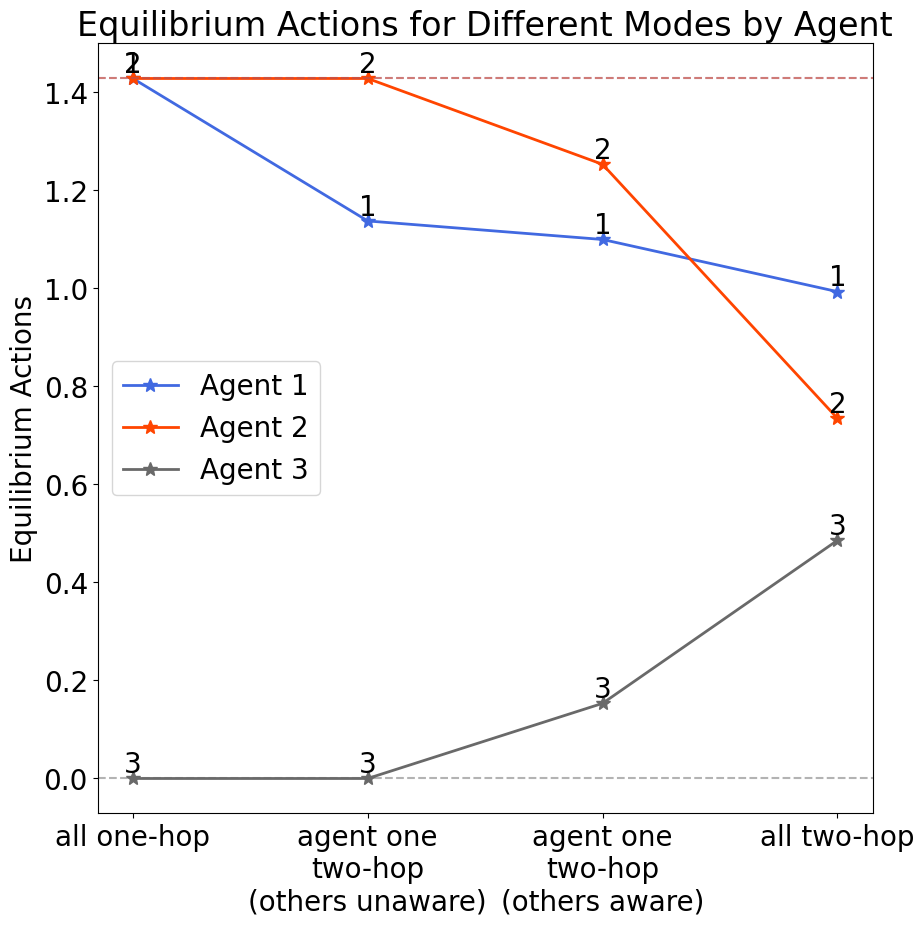

In [23]:
G = np.array([[0, -0.3, 0.2],
              [-0.3, 0, 0.5],
              [0.2, 0.5, 0]])

q = np.ones(len(G))

# Testing all modes
print("Equilibrium actions for 'all one':")
equilibrium_all_one = find_equilibrium(G, q, mode='all one')
print(equilibrium_all_one)

print("\nEquilibrium actions for 'one two unaware':")
equilibrium_one_two = find_equilibrium(G, q, mode='one two unaware')
print(equilibrium_one_two)

print("\nEquilibrium actions for 'one two aware':")
equilibrium_one_two_aware = find_equilibrium(G, q, mode='one two aware')
print(equilibrium_one_two_aware)

print("\nEquilibrium actions for 'all two':")
equilibrium_all_two = find_equilibrium(G, q, mode='all two')
print(equilibrium_all_two)

# print("\nEquilibrium actions for 'all three':")
# equilibrium_all_three = find_equilibrium(G, q, mode='all three')
# print(equilibrium_all_three)

# Create a list of equilibrium values and their corresponding labels
equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
modes = ['all one-hop', 'agent one\ntwo-hop\n(others unaware)', 'agent one\ntwo-hop\n(others aware)', 'all two-hop']
agents = ['Agent 1', 'Agent 2', 'Agent 3']

# Define the x positions
x = np.arange(len(modes))

# Compute bar_g_i and underline_g_i for each row i while keeping the sign
bar_g_i = np.array([G[i][np.argmax(np.abs(G[i]))] for i in range(G.shape[0])])
underline_g_i = np.array([G[i][np.argmin(np.abs(G[i]))] for i in range(G.shape[0])])

# print(bar_g_i)
# print(underline_g_i)

# Compute the sums in the bounds
sum_gkj_xj = np.sum(G @ equilibrium_all_one)
# print(sum_gkj_xj)

# Initialize arrays to store the bounds for each agent in the first mode
lower_bound = np.zeros(len(agents))
upper_bound = np.zeros(len(agents))

# Calculate bounds for each agent in the first mode
for i in range(len(agents)):
    lower_bound[i] = equilibrium_all_one[i] - bar_g_i[i] * sum_gkj_xj
    upper_bound[i] = equilibrium_all_one[i] - underline_g_i[i] * sum_gkj_xj

# Plotting the line chart
plt.figure(figsize=(10, 10))

plt.rcParams.update({'font.size': 20})

# Colors for each agent
colors = ['royalblue', 'orangered', 'dimgray']

# Adding lines for each agent
for i, (agent, color) in enumerate(zip(agents, colors)):
    plt.plot(x, equilibrium_values[:, i], marker='*', label=f'{agent}', color=color, linewidth=2, alpha=1, markersize=10)
    for j, value in enumerate(equilibrium_values[:, i]):
        plt.text(x[j], value, str(i+1), ha='center', va='bottom')

# # Adding bounds as shaded areas for each agent in the first mode
# for i, color in enumerate(colors):
#     plt.fill_between([0.6+(0.1*i), 1], lower_bound[i], upper_bound[i], color=color, alpha=(0.2 + 0.1*i))

# plot "all two-hop" equilibrium values as dashed lines for comparison
for i, value in enumerate(equilibrium_all_one):
    plt.axhline(y=value, linestyle='--', color=colors[i], alpha=0.5)

# Adding title and labels
plt.title('Equilibrium Actions for Different Modes by Agent')
plt.ylabel('Equilibrium Actions')
plt.xticks(x, modes)
plt.legend()

plt.savefig('equilibrium_actions.png')
# Display the plot
plt.show()


In [24]:
# prin G^2
G2 = np.linalg.matrix_power(G, 2)
print(G2)

[[ 0.13  0.1  -0.15]
 [ 0.1   0.34 -0.06]
 [-0.15 -0.06  0.29]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def find_equilibrium_n(G, q, mode='all one', tol=1e-5, max_iter=1000):
    n = len(q)  # Number of agents
    x = np.zeros(n)  # Initial actions
    
    if mode == 'all one':
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum(G[i, :] * x)
                x_new[i] = max(0, q[i] - sum_gx)
            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'all two':
        G2 = np.linalg.matrix_power(G, 2)
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum((G[i, :] + G2[i, :]) * x)
                x_new[i] = max(0, q[i] - sum_gx)

            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'one two aware':
        G2 = np.linalg.matrix_power(G, 2)  # Compute G squared
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            
            # Update x1 using G + G^2
            sum_g1x = np.sum((G[0, :] + G2[0, :]) * x)
            x_new[0] = max(0, q[0] - sum_g1x)

            for i in range(1, n):
                sum_gix = np.sum(G[i, :] * x)
                x_new[i] = max(0, q[i] - sum_gix)
            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                # print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'all three':
        G2 = np.linalg.matrix_power(G, 2)
        G3 = np.linalg.matrix_power(G, 3)
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum((G[i, :] + G2[i, :] + G3[i, :]) * x)
                x_new[i] = max(0, q[i] - sum_gx)

            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new


    print("Max iterations reached without convergence.")
    return x

Equilibrium actions for 'all one':
Converged in 5 iterations.
[0.    3.118 1.66  0.9   1.   ]

Equilibrium actions for 'one two aware':
[0.    3.118 1.66  0.9   1.   ]

Equilibrium actions for 'all two':
Converged in 5 iterations.
[0.    2.632 1.7   0.9   1.   ]


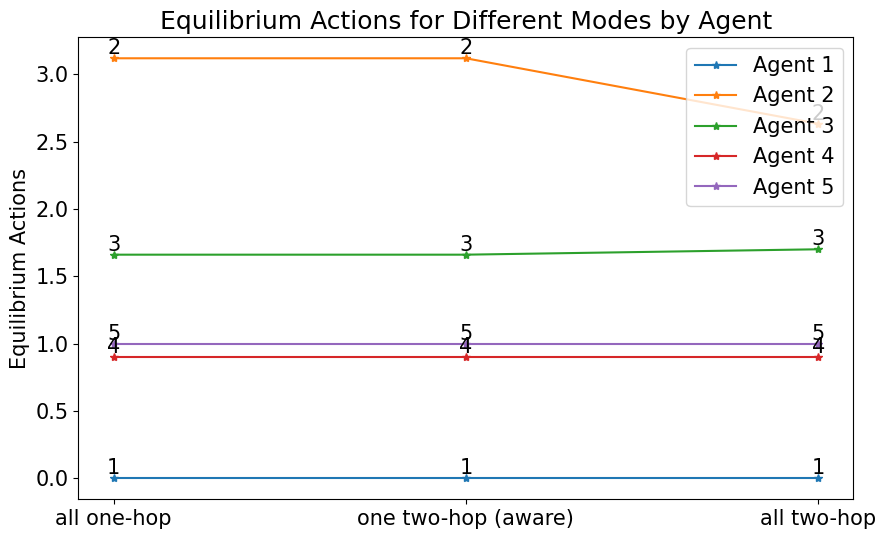

In [6]:
# generate upper triangular matrix
n = 5
G_tri = np.triu(np.random.randint(-10, 10, (n, n)), 1)/10
# as ndarray
G_tri = np.array(G_tri)
q = np.ones(n) 

# Testing all modes
print("Equilibrium actions for 'all one':")
equilibrium_all_one_tri = find_equilibrium_n(G_tri, q, mode='all one')
print(equilibrium_all_one_tri)

print("\nEquilibrium actions for 'one two aware':")
equilibrium_one_two_aware_tri = find_equilibrium_n(G_tri, q, mode='one two aware')
print(equilibrium_one_two_aware_tri)

print("\nEquilibrium actions for 'all two':")
equilibrium_all_two_tri = find_equilibrium_n(G_tri, q, mode='all two')
print(equilibrium_all_two_tri)

# print("\nEquilibrium actions for 'all three':")
# equilibrium_all_three = find_equilibrium(G, q, mode='all three')
# print(equilibrium_all_three)

# Create a list of equilibrium values and their corresponding labels
equilibrium_values = np.array([equilibrium_all_one_tri, equilibrium_one_two_aware_tri, equilibrium_all_two_tri])
modes = ['all one-hop', 'one two-hop (aware)', 'all two-hop']
agents = ['Agent {}'.format(i+1) for i in range(n)]


# Define the x positions
x = np.arange(len(modes))

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Adding lines for each agent
for i, agent in enumerate(agents):
    plt.plot(x, equilibrium_values[:, i], marker='*', label=f'Agent {i+1}')
    for j, value in enumerate(equilibrium_values[:, i]):
        plt.text(x[j], value, str(i+1), ha='center', va='bottom')

# Adding title and labels
plt.title('Equilibrium Actions for Different Modes by Agent')
plt.ylabel('Equilibrium Actions')
plt.xticks(x, modes)
plt.legend()

# Display the plot
plt.show()

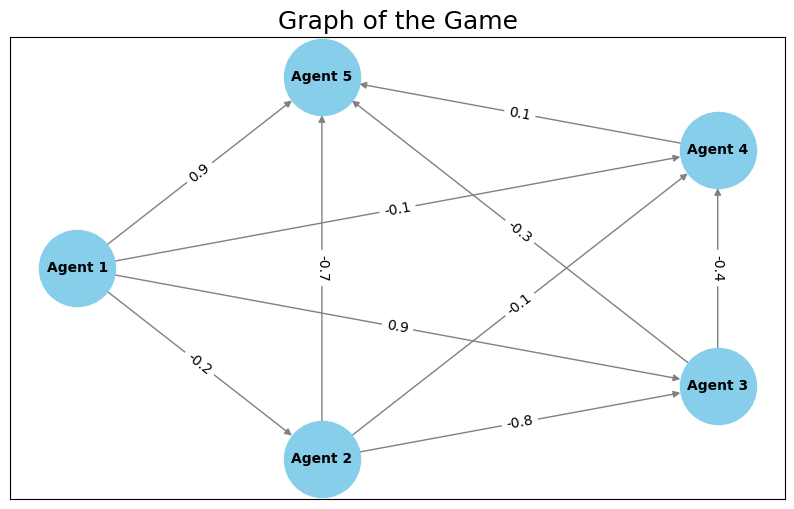

In [16]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()
G.add_nodes_from(agents)
for i in range(n):
    for j in range(n):
        if G_tri[i][j] != 0:
            G.add_edge(agents[i], agents[j], weight=G_tri[i][j])

# position nodes in a hierarchical layout
pos = nx.shell_layout(G)



plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Graph of the Game')
plt.show()
